Holt-Winters is triple exponetial smoothing

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [2]:
df = pd.read_csv('Data/airline_passengers.csv', index_col='Month', parse_dates=True)

In [3]:
df = df.dropna()

In [4]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [5]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
span = 12
alpha = 2/(span+1)
df['EWMA12'] = df['Thousands of Passengers'].ewm(span=span, adjust=False).mean()
df.head()


,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [7]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

In [8]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)
df.head()   

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


<Axes: xlabel='Month'>

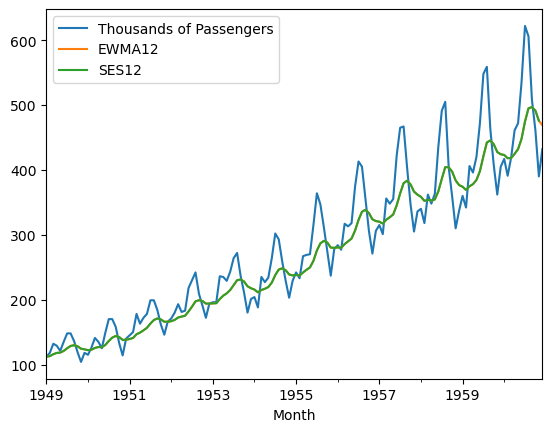

In [9]:
df.plot()

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [11]:
df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.102394
1949-02-01,118,112.923077,112.923077,120.040657
1949-03-01,132,115.857988,115.857988,134.001539
1949-04-01,129,117.879836,117.879836,131.085845
1949-05-01,121,118.359861,118.359861,123.110263


In [12]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12'], dtype='object')

<Axes: xlabel='Month'>

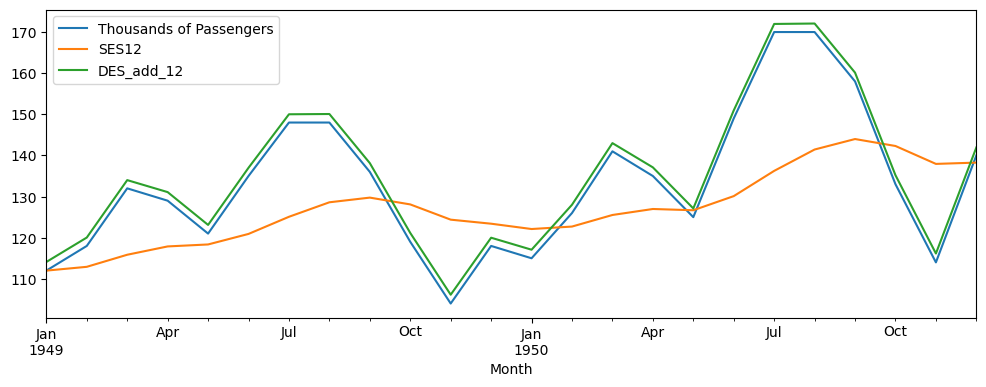

In [15]:
df[['Thousands of Passengers','SES12','DES_add_12']].iloc[:24].plot(figsize=(12,4))

In [16]:
df['DES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12,DES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701
1949-02-01,118,112.923077,112.923077,120.040657,120.031669
1949-03-01,132,115.857988,115.857988,134.001539,134.235979
1949-04-01,129,117.879836,117.879836,131.085845,131.270786
1949-05-01,121,118.359861,118.359861,123.110263,123.156267


<Axes: xlabel='Month'>

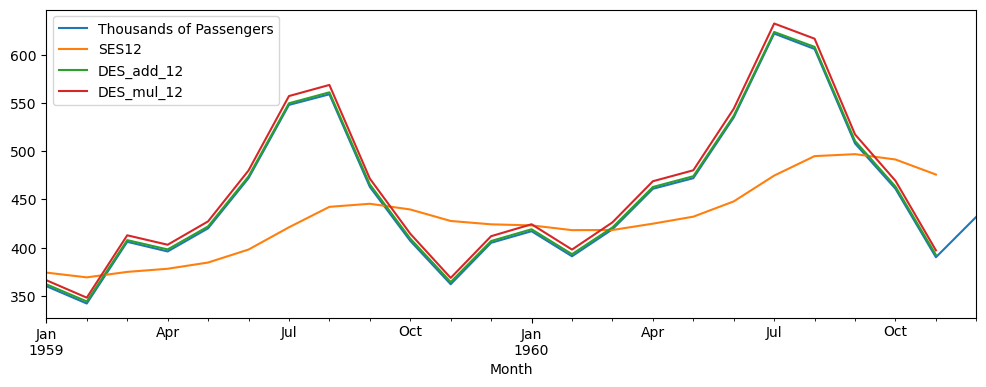

In [19]:
df[['Thousands of Passengers','SES12','DES_add_12','DES_mul_12']].iloc[-24:].plot(figsize=(12,4))

In [20]:
df['TES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues.shift(-1)

c:\Users\Yuhang\anaconda3\envs\ai-env\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: xlabel='Month'>

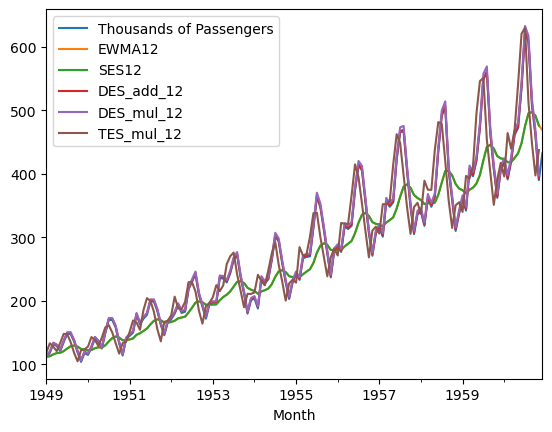

In [22]:
df.plot()

<Axes: xlabel='Month'>

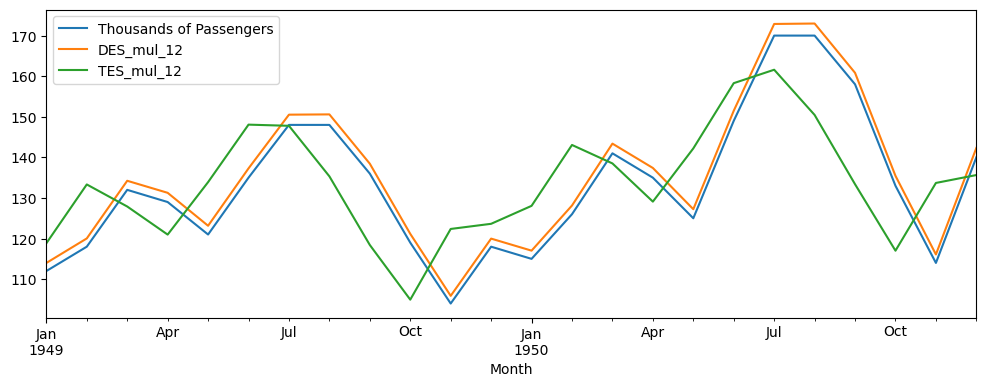

In [24]:
df[['Thousands of Passengers','DES_mul_12','TES_mul_12']].iloc[:24].plot(figsize=(12,4))